In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler


X = np.load("../Data_and_Results/Inputs_YSO_EG_Stars.npy")
Y = np.load("../Data_and_Results/Targets_YSO_EG_Stars.npy")

In [14]:
# YSO = np.where(Y==0)
# EG = np.where(Y==1)
# Stars = np.where(Y==2)

# X_bands = X.transpose()
# X_bands = X_bands[[0,2,4,6]]
# X_bands = X_bands.transpose()


# X_errs = X.transpose()
# X_errs = X_errs[[1,3,5,7]]
# X_errs = X_errs.transpose()

# X_errs.shape

In [15]:
# fig, ax = plt.subplots(2,3,sharey=True,figsize=(20,12))
# # ax[0]
# for i, x in enumerate(X_bands[Stars[0]]):
#     xerr = X_errs[Stars[0]]
#     if i< 5:
#         ymin = x-xerr[i]
#         ymax = x+xerr[i]
#         ax[0][0].plot([3.6,4.5,5.8,8.0],x,'-')
#         ax[0][0].fill_between([3.6,4.5,5.8,8.0], ymin, ymax, label='error band')


#         ax[1][0].plot([3.6,4.5,5.8,8.0],x,'-')

# # ax[0].title("Stars errors")


# for i, x in enumerate(X_bands[EG[0]]):
#     xerr = X_errs[EG[0]]
#     if i< 5:
#         ymin = x-xerr[i]
#         ymax = x+xerr[i]
#         ax[0][1].plot([3.6,4.5,5.8,8.0],x,'-')
#         ax[0][1].fill_between([3.6,4.5,5.8,8.0], ymin, ymax, label='error band')


#         ax[1][1].plot([3.6,4.5,5.8,8.0],x,'-')

# # ax[1].title("EG errors")


# for i, x in enumerate(X_bands[YSO[0]]):
#     xerr = X_errs[YSO[0]]
#     if i< 5:
#         ymin = x-xerr[i]
#         ymax = x+xerr[i]
#         ax[0][2].plot([3.6,4.5,5.8,8.0],x,'-')
#         ax[0][2].fill_between([3.6,4.5,5.8,8.0], ymin, ymax, label='error band')


#         ax[1][2].plot([3.6,4.5,5.8,8.0],x,'-')

# # ax[2].title("YSO errors")
# print(plt.ylim())

In [16]:
# Take only a subset
from sklearn.utils import shuffle
import random
amounts_train = [3073,2034,10000]

class_indices = []
for i in np.unique(Y):
    class_indices.append(np.where(Y==i)[0])

# These arrays will hold the indices of the shuffled indices
train_indices = []

#Randomly choose amounts_train and amounts_valid amounts from these three classes
for i, type_in in enumerate(class_indices):
    # Shuffle the array of indices 
    type_in = shuffle(type_in,random_state=random.randint(0,1000))
    
    # Take the first amount of this shuffled set as the training set
    train_indices = np.append(train_indices,type_in[0:amounts_train[i]]).astype(int)

X = X[train_indices]
Y = Y[train_indices]

In [17]:
# # Save figs for each detection
# for i, x in enumerate(X_bands):
#     fig, ax = plt.subplots(1,1,figsize=(4,4))
#     ax.set_ylim(7,16)
#     ymin = x-X_errs[i]
#     ymax = x+X_errs[i]
#     plt.plot([3.6,4.5,5.8,8.0],x,'-')
#     plt.fill_between([3.6,4.5,5.8,8.0], ymin, ymax)
#     plt.savefig(f"../../../SEDs/SED_ERR_{i}.png",dpi=72)
#     plt.close()


In [18]:
YSO = np.where(Y==0)
EG = np.where(Y==1)
Stars = np.where(Y==2)

X_bands = X.transpose()
X_bands = X_bands[[0,2,4,6]]
X_bands = X_bands.transpose()


X_errs = X.transpose()
X_errs = X_errs[[1,3,5,7]]
X_errs = X_errs.transpose()

X_errs.shape

(15022, 4)

Magnitude is calculated with 
$$ m-m_0 = -2.5\log(F/F_0)$$

Then flux will be:
$$ F = F_0 10^{(m-m_0)/-2.5}$$

In [19]:
def flux(m,F0):
    F = F0*10**(m/-2.5)
    return F
    

In [20]:
X_NEW = X.transpose()

for i, F_0 in enumerate([2.343e-10,2.343e-10,1.212e-10,1.212e-10,6.099e-11,6.099e-11,2.403e-11,2.403e-11]):
    X_NEW[i] = flux(X_NEW[i],F_0)

X_NEW = X_NEW.transpose()

scaler_s = StandardScaler().fit(X_NEW)
X_NEW = scaler_s.transform(X_NEW)

YSO = np.where(Y==0)
EG = np.where(Y==1)
Stars = np.where(Y==2)

X_bands = X_NEW.transpose()
X_bands = X_bands[[0,2,4,6]]
X_bands = X_bands.transpose()


X_errs = X_NEW.transpose()
X_errs = X_errs[[1,3,5,7]]
X_errs = X_errs.transpose()


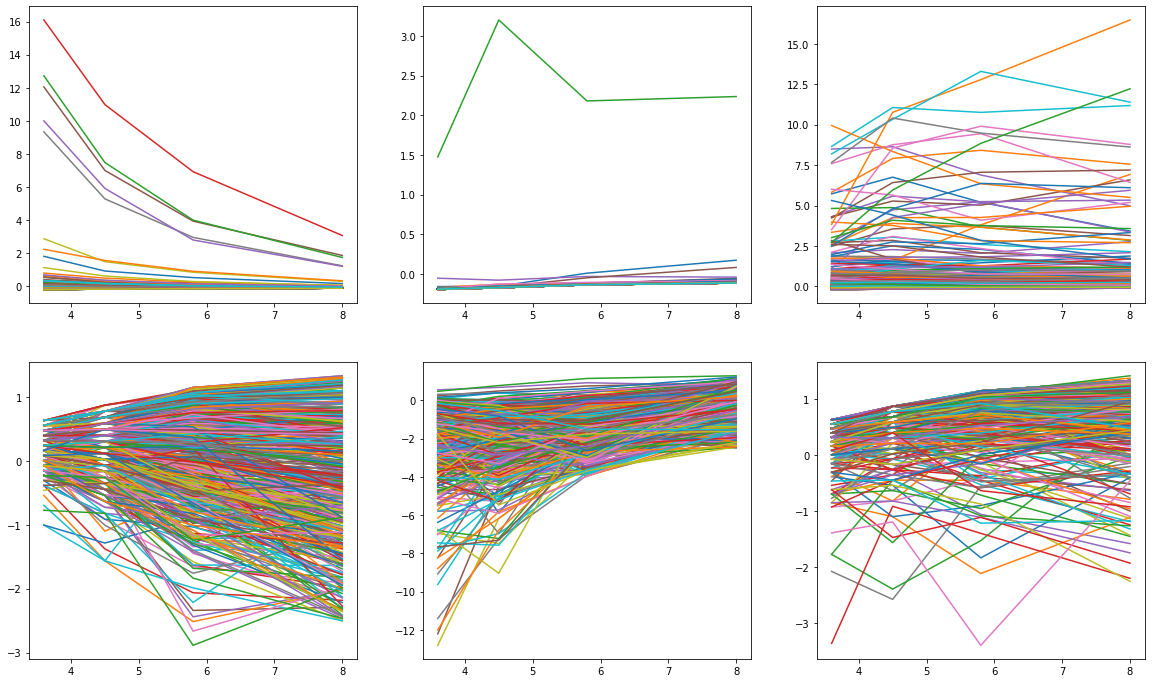

In [21]:
fig, ax = plt.subplots(2,3,sharey=False,figsize=(20,12))
# ax[0]
for i, x in enumerate(X_bands[Stars[0]]):
    xerr = X_errs[Stars[0]]
    if i< 500:
        ax[0][0].plot([3.6,4.5,5.8,8.0],x,'-')
        ax[1][0].plot([3.6,4.5,5.8,8.0],xerr[i],'-')

# ax[0].title("Stars errors")


for i, x in enumerate(X_bands[EG[0]]):
    xerr = X_errs[EG[0]]
    if i< 500:
        ax[0][1].plot([3.6,4.5,5.8,8.0],x,'-')
        ax[1][1].plot([3.6,4.5,5.8,8.0],xerr[i],'-')

# ax[1].title("EG errors")


for i, x in enumerate(X_bands[YSO[0]]):
    xerr = X_errs[YSO[0]]
    if i< 500:
        ax[0][2].plot([3.6,4.5,5.8,8.0],x,'-')
        ax[1][2].plot([3.6,4.5,5.8,8.0],xerr[i],'-')

# ax[2].title("YSO errors")
# print(plt.ylim())

In [22]:
# # Save figs for each detection
for i, x in enumerate(X_bands):
    fig, ax = plt.subplots(1,1,figsize=(4,4))
    plt.plot([3.6,4.5,5.8,8.0],x,'-')
    ax.axis('off')
    plt.savefig(f"SEDs/SED_ERR_{i}.png",dpi=7) # dpi=7 to make the tensors 28x28
    plt.close()

np.save("Targets_SEDs.npy",Y)

In [23]:
seds = !ls SEDs

np.save("SED_filenames",seds)